# Final Project

## VIsualization and Exploration of the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv("train.csv")
unique = pd.read_csv("unique_m.csv")
print("Keys of Train Dataset:{}".format(train.keys()))
print("Keys of Unique Dataset: {}".format(unique.keys()))

Keys of Train Dataset:Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAff

In [2]:
print("Shape of Keys Dataset: {}".format(train.shape))
print("Shape of Unique Dataset: {}".format(unique.shape))

Shape of Keys Dataset: (21263, 82)
Shape of Unique Dataset: (21263, 88)


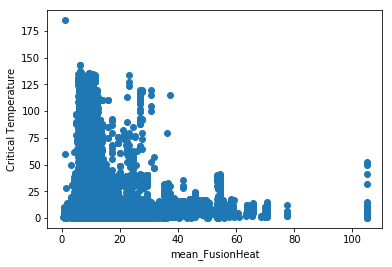

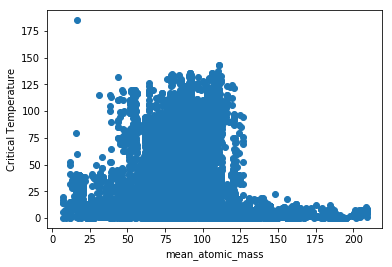

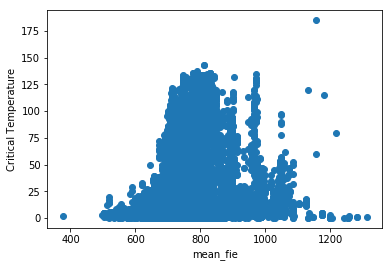

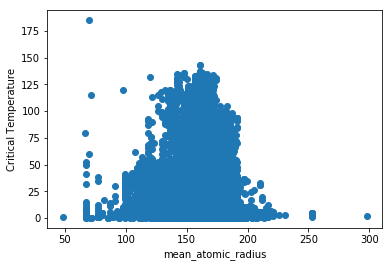

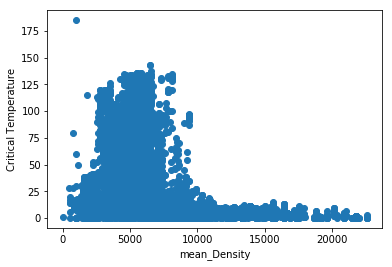

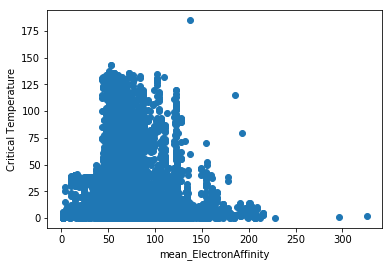

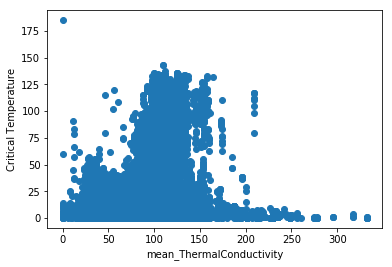

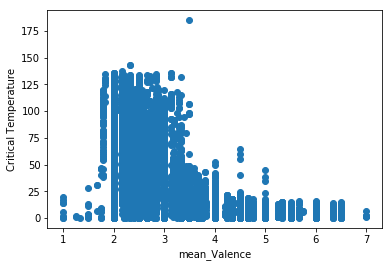

In [3]:
X = 'mean_FusionHeat'
plt.scatter(train[X], train['critical_temp'])
plt.ylabel('Critical Temperature')
plt.xlabel(X)
plt.show()
X = 'mean_atomic_mass'
plt.scatter(train[X], train['critical_temp'])
plt.ylabel('Critical Temperature')
plt.xlabel(X)
plt.show()
X = 'mean_fie'
plt.scatter(train[X], train['critical_temp'])
plt.ylabel('Critical Temperature')
plt.xlabel(X)
plt.show()
X = 'mean_atomic_radius'
plt.scatter(train[X], train['critical_temp'])
plt.ylabel('Critical Temperature')
plt.xlabel(X)
plt.show()
X = 'mean_Density'
plt.scatter(train[X], train['critical_temp'])
plt.ylabel('Critical Temperature')
plt.xlabel(X)
plt.show()
X = 'mean_ElectronAffinity'
plt.scatter(train[X], train['critical_temp'])
plt.ylabel('Critical Temperature')
plt.xlabel(X)
plt.show()
X = 'mean_ThermalConductivity'
plt.scatter(train[X], train['critical_temp'])
plt.ylabel('Critical Temperature')
plt.xlabel(X)
plt.show()
X = 'mean_Valence'
plt.scatter(train[X], train['critical_temp'])
plt.ylabel('Critical Temperature')
plt.xlabel(X)
plt.show()

In [4]:
temp = np.array(unique['critical_temp'])
elements = unique.drop('critical_temp', axis=1)
elements = elements.drop('material', axis=1)
elements = np.array(elements)
print("Shape of critical temperatures: {}".format(temp.shape))
print("Shape of elements: {}".format(elements.shape))

Shape of critical temperatures: (21263,)
Shape of elements: (21263, 86)


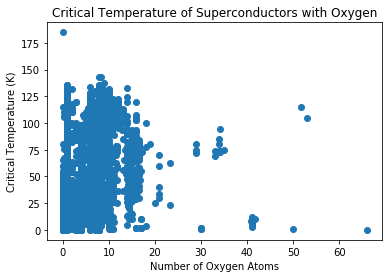

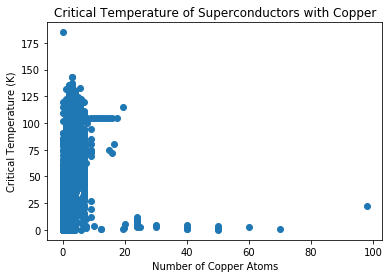

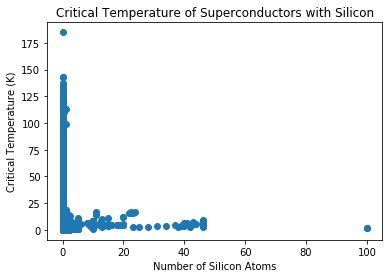

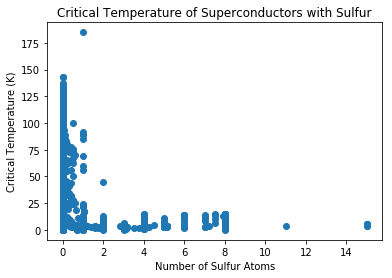

In [5]:
X = 'O'
plt.scatter(unique[X], temp)
plt.title("Critical Temperature of Superconductors with Oxygen")
plt.xlabel("Number of Oxygen Atoms")
plt.ylabel("Critical Temperature (K)")
plt.show()
X = 'Cu'
plt.scatter(unique[X], temp)
plt.title("Critical Temperature of Superconductors with Copper")
plt.xlabel("Number of Copper Atoms")
plt.ylabel("Critical Temperature (K)")
plt.show()
X = 'Si'
plt.scatter(unique[X], temp)
plt.title("Critical Temperature of Superconductors with Silicon")
plt.xlabel("Number of Silicon Atoms")
plt.ylabel("Critical Temperature (K)")
plt.show()
X = 'S'
plt.scatter(unique[X], temp)
plt.title("Critical Temperature of Superconductors with Sulfur")
plt.xlabel("Number of Sulfur Atoms")
plt.ylabel("Critical Temperature (K)")
plt.show()

Iron Based Superconductors

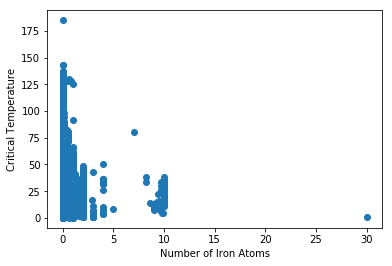

In [6]:
plt.scatter(unique['Fe'], unique['critical_temp'])
plt.xlabel('Number of Iron Atoms')
plt.ylabel("Critical Temperature")
plt.show()

### Visualization of Critical Temperature

In [7]:
temp = train['critical_temp']
print("Maximum Critical Temperature: {}".format(max(temp)))
print("Minimum Critical Temperature: {}".format(min(temp)))
print("Mean of Critical Temperature: {}".format(np.mean(temp)))
print("Median of Critical Temperature: {}".format(np.median(temp)))
print("Standard Deviation of Critical Temperature: {}".format(np.std(temp)))

Maximum Critical Temperature: 185.0
Minimum Critical Temperature: 0.00021
Mean of Critical Temperature: 34.421219135352274
Median of Critical Temperature: 20.0
Standard Deviation of Critical Temperature: 34.25355694704641


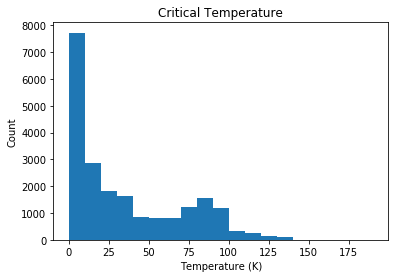

In [8]:
plt.hist(train['critical_temp'], bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190])
plt.title("Critical Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Count")
plt.show()

### Plots for critical temperature < 10K

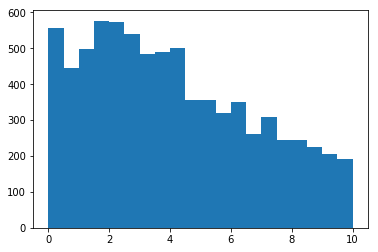

In [9]:
under = train['critical_temp'][(train['critical_temp']<10)]
plt.hist(under, bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])
plt.show()

## Random Forest

Prepping Data

In [10]:
temp = np.array(train['critical_temp'])
features = train.drop('critical_temp', axis=1)
features = np.array(features)
print("Shape of Critical Temperature: {}".format(temp.shape))
print("Shape of Features: {}".format(features.shape))
#Split into Training and Test
from sklearn.model_selection import train_test_split
train_features, test_features, train_temp, test_temp = train_test_split(features, temp)
print("Shape of train_features: {}".format(train_features.shape))
print("Shape of test_features: {}".format(test_features.shape))
print("Shape of train_temp: {}".format(train_temp.shape))
print("Shape of test_temp: {}".format(test_temp.shape))

Shape of Critical Temperature: (21263,)
Shape of Features: (21263, 81)
Shape of train_features: (15947, 81)
Shape of test_features: (5316, 81)
Shape of train_temp: (15947,)
Shape of test_temp: (5316,)


Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=10)
RF.fit(train_features, train_temp)

/home/kimbroua/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Results

Random Forest with 10 trees

Mean Absolute Error: 5.32 K
Mean Squared Error: 91.36696120015077
Variance Score: 0.9233603049057182


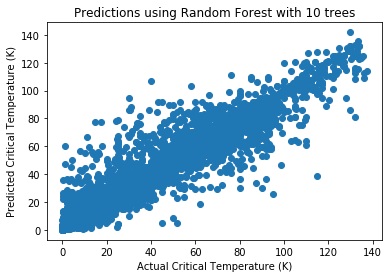

In [12]:
predictions = RF.predict(test_features)
errors = abs(predictions - test_temp)
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Absolute Error:", round(np.mean(errors), 2), 'K')
print("Mean Squared Error: {}".format(mean_squared_error(test_temp, predictions)))
print("Variance Score: {}".format(r2_score(test_temp, predictions)))
plt.scatter(test_temp, predictions)
plt.title("Predictions using Random Forest with 10 trees")
plt.xlabel("Actual Critical Temperature (K)")
plt.ylabel("Predicted Critical Temperature (K)")
plt.show()

Tuning number of trees using GridSearchCV

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [1,10]}
GS = GridSearchCV(RF, parameters, cv=5)
GS.fit(features, temp)
print("Best Number of Trees: {}".format(GS.best_params_))

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [100,10]}
GS = GridSearchCV(RF, parameters, cv=5)
GS.fit(features, temp)
print("Best Number of Trees: {}".format(GS.best_params_))

Mean Absolute Error: 5.18 K
Mean Squared Error: 86.7559596317737
Variance Score: 0.9272280679311902


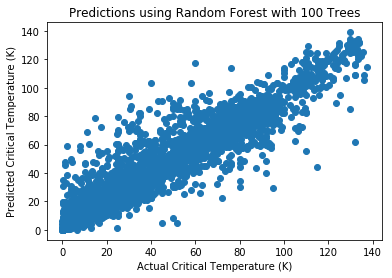

In [14]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100)
RF.fit(train_features, train_temp)
predictions = RF.predict(test_features)
errors = abs(predictions - test_temp)
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Absolute Error:", round(np.mean(errors), 2), 'K')
print("Mean Squared Error: {}".format(mean_squared_error(test_temp, predictions)))
print("Variance Score: {}".format(r2_score(test_temp, predictions)))
plt.scatter(test_temp, predictions)
plt.title("Predictions using Random Forest with 100 Trees")
plt.xlabel("Actual Critical Temperature (K)")
plt.ylabel("Predicted Critical Temperature (K)")
plt.show()

## Using SVM

In [15]:
from sklearn import svm
SVC = svm.SVC()
SVC.fit(train_features, train_temp)
predictions = SVC.predict(text_features)
errors = abs(predictions - test_temp)
print("Mean Absolute Error:", round(np.mean(errors), 2), 'K')
print("Mean Squared Error: {}".format(mean_squared_error(test_temp, predictions)))
print("Variance Score: {}".format(r2_score(test_temp, predictions)))

ValueError: Unknown label type: 'continuous'

In [16]:
from sklearn.model_selection import GridSearchCV
parameters = {'gamma':[0.1, 1, 10]}
CV = GridSearchCV(SVC, parameters, cv=5)
CV.fit(features, temp)
print("Best parameter found: {}".format(CV.best_params_))
print("Means: {}".format(CV.cv_results_['mean_test_score']))
print("Standard Deviation: {}".format(CV.cv_results_['std_test_score']))

ValueError: Unknown label type: 'continuous'